# Оценка на пандемията от COVID-19

## Зареждане на данни

Ще използваме данни за заразени с COVID-19, предоставени от [Центъра за системни науки и инженерство](https://systems.jhu.edu/) (CSSE) към [Университета Джон Хопкинс](https://jhu.edu/). Данните са налични в [това GitHub хранилище](https://github.com/CSSEGISandData/COVID-19).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

Можем да заредим най-новите данни директно от GitHub, използвайки `pd.read_csv`. Ако по някаква причина данните не са налични, винаги можете да използвате копието, налично локално в папката `data` - просто премахнете коментара от реда по-долу, който дефинира `base_url`:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

Можем да видим, че всеки ред от таблицата определя броя на заразените лица за всяка държава и/или провинция, а колоните съответстват на дати. Подобни таблици могат да бъдат заредени за други данни, като броя на възстановените и броя на смъртните случаи.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Разбиране на данните

От таблицата по-горе ролята на колоната за провинция не е ясна. Нека разгледаме различните стойности, които се намират в колоната `Province/State`:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## Предварителна обработка на данните

Не се интересуваме от разделянето на държавите на по-малки територии, затова първо ще премахнем това разделение и ще обединим информацията за всички територии, за да получим данни за цялата държава. Това може да се направи с помощта на `groupby`:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

Можете да видите, че поради използването на `groupby` всички DataFrame-и сега са индексирани по държава/регион. Следователно можем да достъпим данните за конкретна държава, като използваме `.loc`:


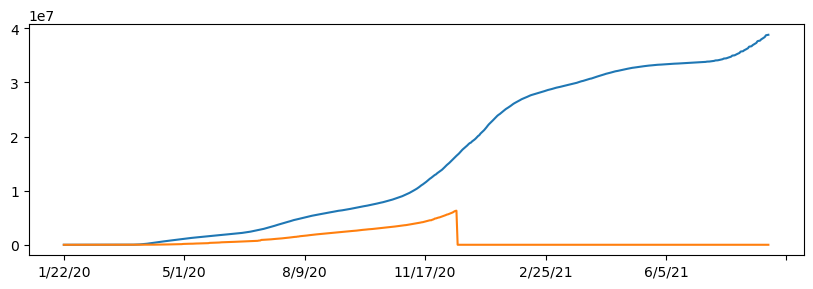

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **Забележка** как използваме `[2:]`, за да премахнем първите два елемента от последователност, които съдържат геолокацията на дадена страна. Можем също така да премахнем тези две колони изцяло:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Разследване на данните

Сега нека преминем към разследване на конкретна държава. Нека създадем рамка, която съдържа данните за инфекциите, индексирани по дата:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

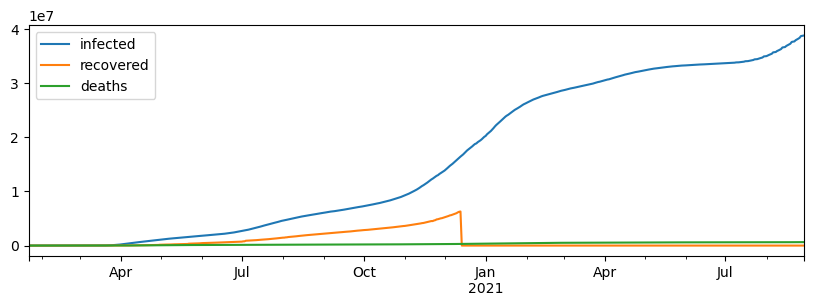

In [134]:
df.plot()
plt.show()

Сега нека изчислим броя на новозаразените хора всеки ден. Това ще ни позволи да видим скоростта, с която пандемията напредва. Най-лесният начин да го направим е да използваме `diff`:


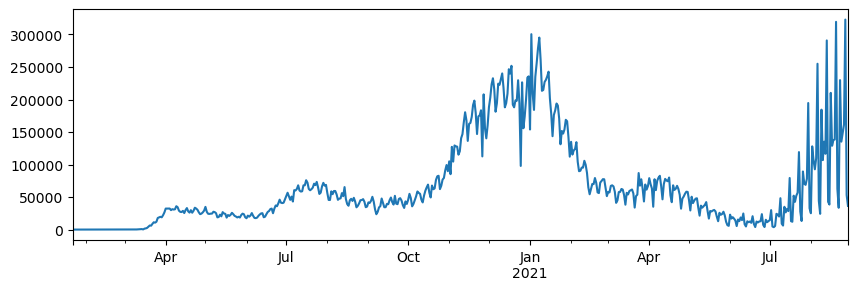

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

Можем да видим големи колебания в данните. Нека разгледаме по-отблизо един от месеците:


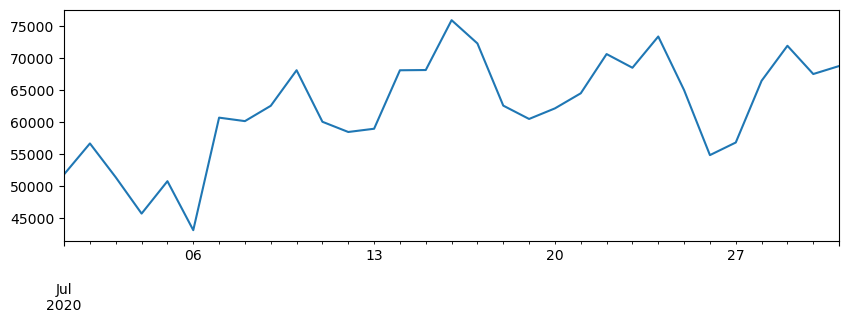

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

Изглежда ясно, че има седмични колебания в данните. Тъй като искаме да можем да видим тенденциите, има смисъл да изгладим кривата, като изчислим подвижна средна стойност (т.е. за всеки ден ще изчислим средната стойност на предходните няколко дни):


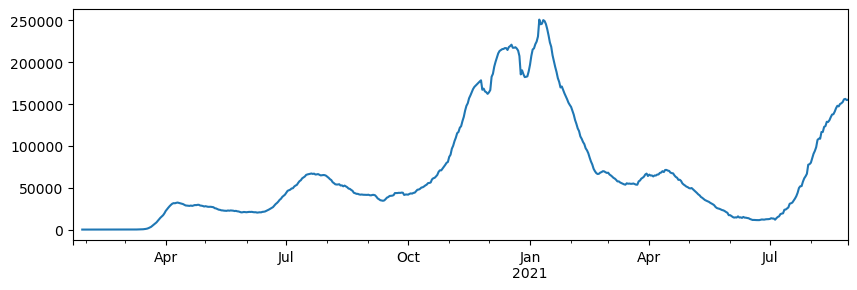

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

За да можем да сравним няколко държави, може да искаме да вземем предвид населението на държавата и да сравним процента на заразените лица спрямо населението на държавата. За да получим населението на държавата, нека заредим набора от данни за държавите:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

Тъй като този набор от данни съдържа информация както за държави, така и за провинции, за да получим населението на цялата държава, трябва да бъдем малко по-умни:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

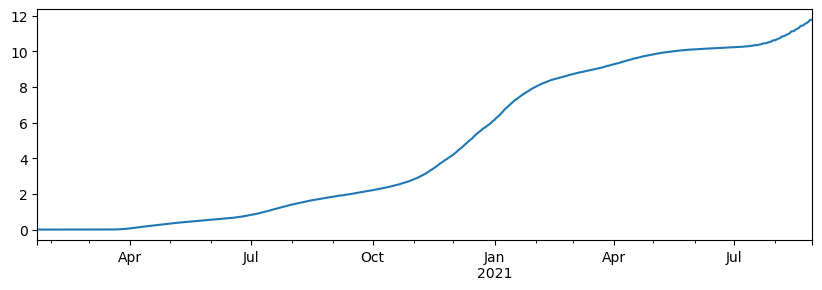

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## Изчисляване на $R_t$

За да разберем колко заразна е болестта, разглеждаме **основния репродуктивен брой** $R_0$, който показва броя на хората, които един заразен човек би заразил допълнително. Когато $R_0$ е повече от 1, епидемията вероятно ще се разпространи.

$R_0$ е характеристика на самата болест и не отчита някои защитни мерки, които хората могат да предприемат, за да забавят пандемията. По време на развитието на пандемията можем да оценим репродуктивния брой $R_t$ за всеки даден момент $t$. Доказано е, че този брой може приблизително да се изчисли, като се вземе прозорец от 8 дни и се изчисли $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
където $I_t$ е броят на новозаразените лица за ден $t$.

Нека изчислим $R_t$ за нашите данни за пандемията. За да направим това, ще вземем подвижен прозорец от 8 стойности на `ninfected` и ще приложим функцията за изчисляване на горното съотношение:


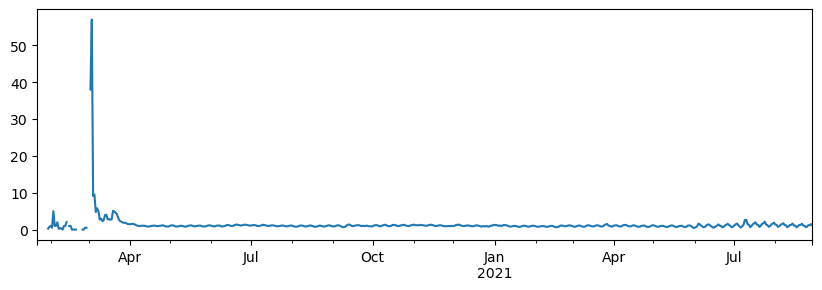

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

Можете да забележите, че има някои пропуски в графиката. Те могат да бъдат причинени от `NaN` или `inf` стойности, присъстващи в набора от данни. `inf` може да се появи при деление на 0, а `NaN` може да показва липсващи данни или липса на налични данни за изчисляване на резултата (например в самото начало на нашия кадър, където плъзгащият прозорец с ширина 8 все още не е наличен). За да направим графиката по-приятна, трябва да запълним тези стойности, използвайки функциите `replace` и `fillna`.

Нека разгледаме по-подробно началото на пандемията. Също така ще ограничим стойностите на y-оста, за да показваме само стойности под 6, с цел по-добра видимост, и ще начертаем хоризонтална линия на стойност 1.


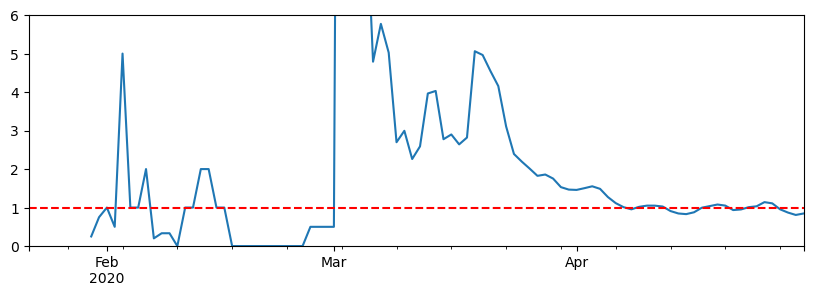

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

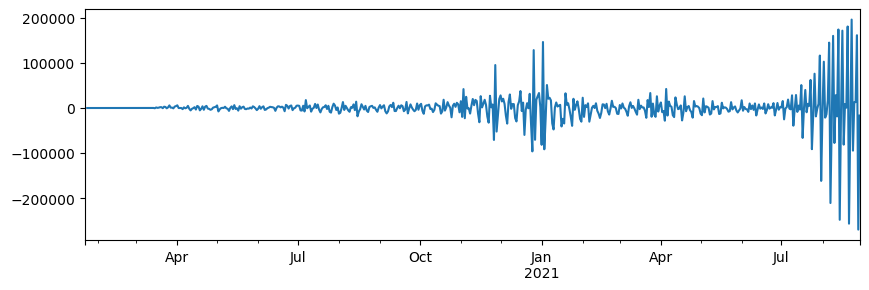

In [143]:
df['ninfected'].diff().plot()
plt.show()

Като се има предвид фактът, че има много колебания в данните, причинени от докладването, има смисъл да се изглади кривата чрез прилагане на подвижна средна стойност, за да се получи общата картина. Нека отново се съсредоточим върху първите месеци на пандемията:


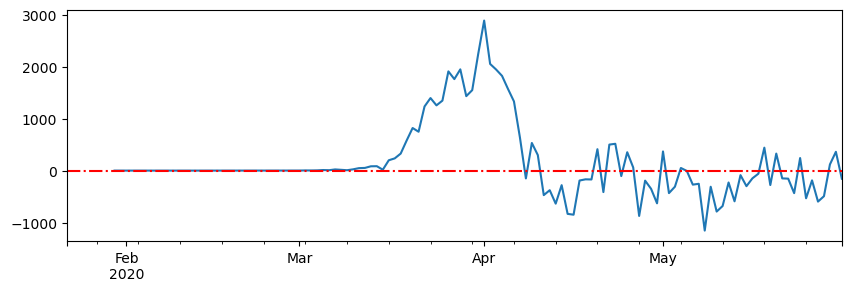

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## Предизвикателство

Сега е време да се забавлявате повече с кода и данните! Ето няколко предложения, с които можете да експериментирате:
* Вижте разпространението на пандемията в различни държави.
* Начертайте графики на $R_t$ за няколко държави на един график за сравнение или направете няколко графики една до друга.
* Вижте как броят на смъртните случаи и възстановяванията се корелира с броя на заразените случаи.
* Опитайте да разберете колко дълго трае типичното заболяване, като визуално корелирате скоростта на заразяване и скоростта на смъртност и търсите някои аномалии. Може да се наложи да разгледате различни държави, за да откриете това.
* Изчислете смъртността и как тя се променя с времето. Може да искате да вземете предвид продължителността на заболяването в дни, за да изместите една времева серия преди да направите изчисления.


## Референции

Можете да разгледате допълнителни изследвания за разпространението на епидемията от COVID в следните публикации:
* [Модел Sliding SIR за оценка на Rt по време на пандемията от COVID](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), блог пост от [Дмитрий Сошников](http://soshnikov.com)
* Т.Петрова, Д.Сошников, А.Грунин. [Оценка на времево-зависимия коефициент на възпроизводство за глобалното разпространение на COVID-19](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Код за горепосочената статия в GitHub](https://github.com/shwars/SlidingSIR)



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматизираните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия роден език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален човешки превод. Ние не носим отговорност за недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
